In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.fashion_mnist
(train_in,train_out), (test_in,test_out) = data.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_in = train_in/255
test_in = test_in/255

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
type(train_in),train_in.shape,type(train_out),train_out.shape

(numpy.ndarray, (60000, 28, 28), numpy.ndarray, (60000,))

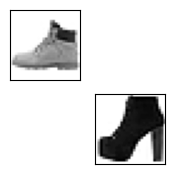

In [4]:
plt.figure(figsize=(2,2))
plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.imshow(train_in[90],cmap=plt.cm.binary)
plt.subplot(2,2,4)
plt.imshow(train_in[44],cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
#model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10))

myopt = tf.keras.optimizers.Adam()
myloss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=myopt,loss=myloss,metrics=['accuracy'])

In [6]:
model.fit(train_in,train_out,epochs=40)

Epoch 1/40
1875/1875 [==============================] - 4s 1ms/step - loss: 0.5248 - accuracy: 0.8170
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4012 - accuracy: 0.8579
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3596 - accuracy: 0.8704
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8766
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3148 - accuracy: 0.8853
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3002 - accuracy: 0.8899
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2898 - accuracy: 0.8931
Epoch 8/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2794 - accuracy: 0.8972
Epoch 9/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2703 - accuracy: 0.8989
Epoch 10/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.262

In [5]:
loss, acc = model.evaluate(test_in,test_out,verbose=2)

313/313 - 0s - loss: 0.3667 - accuracy: 0.8657


In [60]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return

In [67]:
prob = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = prob.predict(test_in)

In [53]:
def plot_img(i,pred,images,actuals):
    act = actuals[i]
    
    
    
    pred_label = np.argmax(pred)
    perc = round(max(pred)*100,2)
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i],cmap=plt.cm.binary)
    
    if pred_label == act:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[pred_label]} {perc}% ({class_names[act]})",
              color=color)
    
    

def plot_dat(i,prediction,actuals):
    act = actuals[i]
    plt.xticks(range(10))
    plt.yticks([])
    
    barplt = plt.bar(range(10),prediction,color='black')
    plt.ylim(0,1)
    pred_label = np.argmax(prediction)
    
    barplt[pred_label].set_color('red')
    barplt[act].set_color('blue')

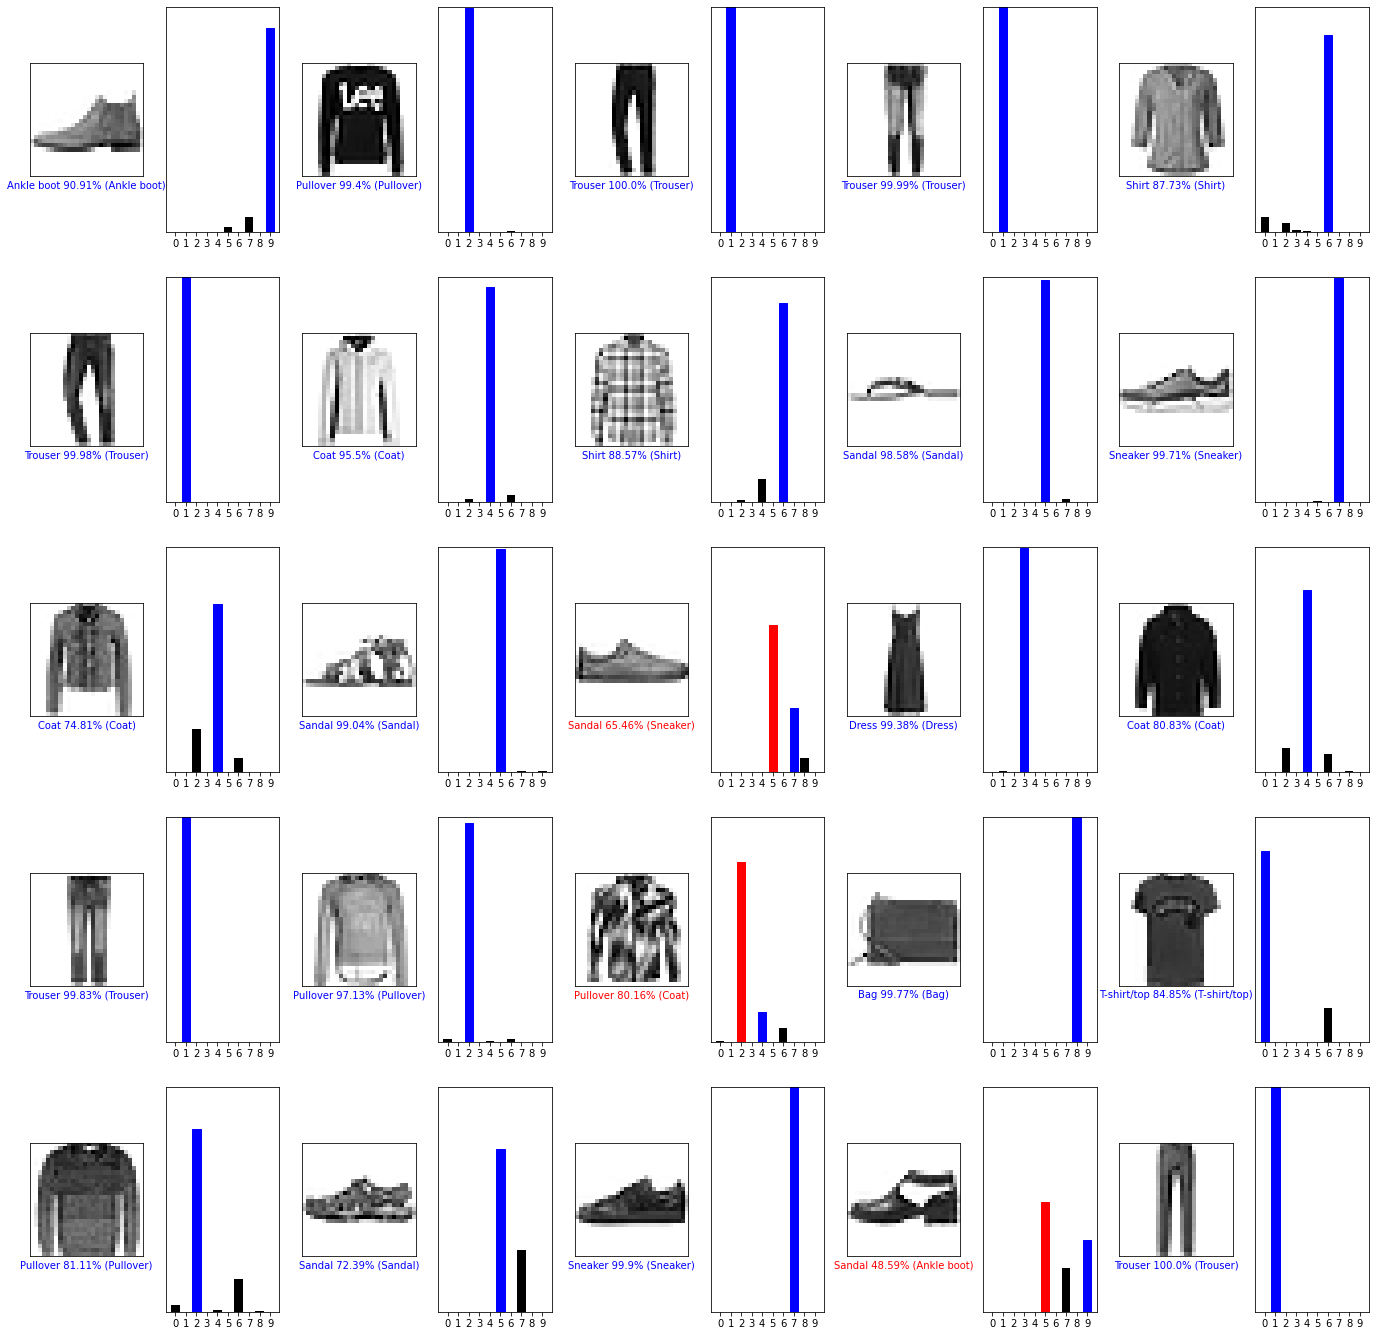

In [55]:
plt.figure(figsize=(24,24))
col = 5
row = 5
for i in range(col*row):
    plt.subplot(row,2*col,2*i+1)
    plot_img(i,predictions[i],test_in,test_out)
    plt.subplot(row,2*col,2*i+2)
    plot_dat(i,predictions[i],test_out)
plt.show()


In [48]:
#To test a single new object, you need to put it into a list of its own
img = test_in[32]
img = (np.expand_dims(img,0)) 
#this works better than trying to put it into a tuple like: (1,img)
#and actually that tuple method doesn't work at all for some reason...
#needs to be a numpy array
type(img), img.shape

(numpy.ndarray, (1, 28, 28))

In [50]:
single_prediction = prob.predict(img)
single_prediction

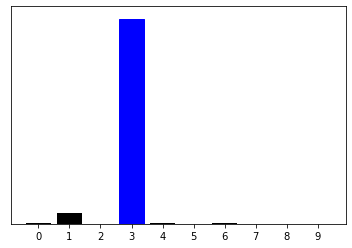

In [54]:
i=32
plot_dat(i,single_prediction[0],test_out)

In [65]:
train_out

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [66]:
predictions[50]

array([6.9518387e-04, 3.2162118e-06, 3.3110666e-01, 1.6959224e-04,
       6.0225844e-01, 3.2179980e-13, 6.5708153e-02, 7.3065772e-12,
       5.8657766e-05, 5.3844406e-08], dtype=float32)